In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
dataFrame=pd.read_csv("/home/hrugvedb/Desktop/hrugved/dataset/Telco_customer_churn.csv")
dataFrame


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
df=dataFrame.copy()

In [4]:
df

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [6]:
df["Latitude"]*10000


0       339641.31
1       340592.81
2       340480.13
3       340621.25
4       340392.24
          ...    
7038    343417.37
7039    346678.15
7040    345598.82
7041    341678.00
7042    344249.26
Name: Latitude, Length: 7043, dtype: float64

In [7]:
df["Longitude"]*10000


0      -1182727.83
1      -1183074.20
2      -1182939.53
3      -1183157.09
4      -1182662.93
           ...    
7038   -1165394.16
7039   -1175361.83
7040   -1156371.64
7041   -1168643.30
7042   -1171845.03
Name: Longitude, Length: 7043, dtype: float64

In [8]:
df["Longitude"]*10000000


0      -1.182728e+09
1      -1.183074e+09
2      -1.182940e+09
3      -1.183157e+09
4      -1.182663e+09
            ...     
7038   -1.165394e+09
7039   -1.175362e+09
7040   -1.156372e+09
7041   -1.168643e+09
7042   -1.171845e+09
Name: Longitude, Length: 7043, dtype: float64

In [8]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [9]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [10]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [11]:
df['SeniorCitizen']=df['SeniorCitizen'].map({'Yes':1,'No':0})

In [12]:
df.drop(['LatLong'],axis=1,inplace=True)

In [13]:
df.drop(['ChurnReason'],axis=1,inplace=True)

In [14]:
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)

In [15]:
df['Latitude']=df['Latitude'].astype(int)

In [16]:
df['Longitude']=df['Longitude'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        7043 non-null   object
 1   Count             7043 non-null   int64 
 2   Country           7043 non-null   object
 3   State             7043 non-null   object
 4   City              7043 non-null   object
 5   ZipCode           7043 non-null   int64 
 6   Latitude          7043 non-null   int64 
 7   Longitude         7043 non-null   int64 
 8   Gender            7043 non-null   object
 9   SeniorCitizen     7043 non-null   int64 
 10  Partner           7043 non-null   int64 
 11  Dependents        7043 non-null   int64 
 12  TenureMonths      7043 non-null   int64 
 13  PhoneService      7043 non-null   int64 
 14  MultipleLines     7043 non-null   object
 15  InternetService   7043 non-null   object
 16  OnlineSecurity    7043 non-null   object
 17  OnlineBackup  

In [18]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [19]:
df.drop(['Country'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        7043 non-null   object
 1   Count             7043 non-null   int64 
 2   State             7043 non-null   object
 3   City              7043 non-null   object
 4   ZipCode           7043 non-null   int64 
 5   Latitude          7043 non-null   int64 
 6   Longitude         7043 non-null   int64 
 7   Gender            7043 non-null   int64 
 8   SeniorCitizen     7043 non-null   int64 
 9   Partner           7043 non-null   int64 
 10  Dependents        7043 non-null   int64 
 11  TenureMonths      7043 non-null   int64 
 12  PhoneService      7043 non-null   int64 
 13  MultipleLines     7043 non-null   object
 14  InternetService   7043 non-null   object
 15  OnlineSecurity    7043 non-null   object
 16  OnlineBackup      7043 non-null   object
 17  DeviceProtecti

In [21]:
df = pd.get_dummies(df, columns=['TechSupport'])

In [22]:
df = pd.get_dummies(df, columns=['MultipleLines'])

In [23]:
df = pd.get_dummies(df, columns=['InternetService'])

In [24]:
df = pd.get_dummies(df, columns=['OnlineSecurity'])

In [25]:
df = pd.get_dummies(df, columns=['OnlineBackup'])

In [26]:
df = pd.get_dummies(df, columns=['DeviceProtection'])

In [27]:
df = pd.get_dummies(df, columns=['StreamingTV'])

In [28]:
df = pd.get_dummies(df, columns=['Streaming Movies'])

In [29]:
df = pd.get_dummies(df, columns=['Contract'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   object
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder to the categorical column
le.fit(df['City'])

# Transform the categorical column
df['City'] = le.transform(df['City'])

In [32]:
le.fit(df['PaymentMethod'])

# Transform the categorical column
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [33]:
le.fit(df['TotalCharges'])

# Transform the categorical column
df['TotalCharges'] = le.transform(df['TotalCharges'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   int64 
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [35]:
df['ChurnLabel']=df['ChurnLabel'].map({'Yes':1,'No':0})

In [36]:
df['ChurnLabel']

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: ChurnLabel, Length: 7043, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   int64 
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [38]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   int64 
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [40]:
df.drop(['CustomerID','State','Count'],axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   City                                  7043 non-null   int64
 1   ZipCode                               7043 non-null   int64
 2   Latitude                              7043 non-null   int64
 3   Longitude                             7043 non-null   int64
 4   Gender                                7043 non-null   int64
 5   SeniorCitizen                         7043 non-null   int64
 6   Partner                               7043 non-null   int64
 7   Dependents                            7043 non-null   int64
 8   TenureMonths                          7043 non-null   int64
 9   PhoneService                          7043 non-null   int64
 10  PaperlessBilling                      7043 non-null   int64
 11  PaymentMethod                         7043 

In [67]:
y=df['ChurnValue']
X=df.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)

In [103]:
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [104]:
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

In [105]:
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.93

the classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1806
           1       0.92      0.79      0.85       660

    accuracy                           0.93      2466
   macro avg       0.92      0.88      0.90      2466
weighted avg       0.93      0.93      0.92      2466



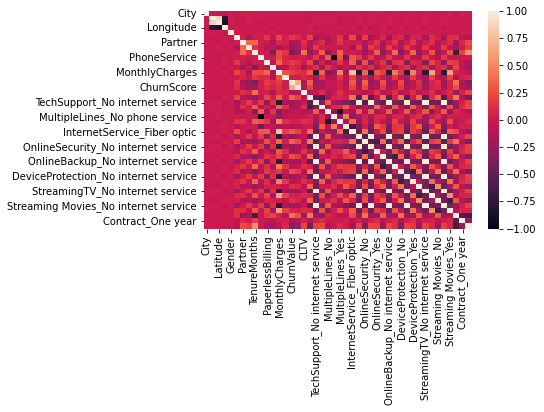

In [106]:
corr=df.corr()
mapp=sns.heatmap(corr)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   City                                  7043 non-null   int64
 1   ZipCode                               7043 non-null   int64
 2   Latitude                              7043 non-null   int64
 3   Longitude                             7043 non-null   int64
 4   Gender                                7043 non-null   int64
 5   SeniorCitizen                         7043 non-null   int64
 6   Partner                               7043 non-null   int64
 7   Dependents                            7043 non-null   int64
 8   TenureMonths                          7043 non-null   int64
 9   PhoneService                          7043 non-null   int64
 10  PaperlessBilling                      7043 non-null   int64
 11  PaymentMethod                         7043 

In [66]:
df.drop(['ChurnLabel'],axis=1,inplace=True)